# Práctica 4 : Proyecto de Minería de Datos (Vinos)
## Alberto Urbina | Ignacio Murube


## 3.1 Definición de la tarea de minería de datos

- Definición del objetivo :
Predicción de la densidad de los vinos blancos  de "Vinho Verde" Portugués en función de los azucares residuales en las muestras tomadas.

- Selección de los modelos y los métodos : Análisis de Regresión

- Obtención de los datos : Se hará uso del dataset provisto
https://archive.ics.uci.edu/dataset/186/wine+quality
- Visualización :

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score


In [4]:
df_white_wine = pd.read_csv("winequality-white.csv", delimiter=";")
df_white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## 3.2 Preparación de los datos

- Limpiar los datos :
El dataset provisto declara que no existen valores faltantes en ninguna de las variables, lo cúal será comprobado brevemente.
También se deberá analizar si alguna de las muestras se puede considerar atípica y, en caso de existir, filtrarla por eliminación.
- Transformar los datos :
En este caso los datos se encuentran propiamente tabulados con valores continuos. Se deberá extraer el subset de variables a utilizar.
- Reducir la dimensionalidad :
Se deberá analizar si alguna de las variables utilizadas para la regresión no son útiles para predecir el nivel alcohólico de los vinos.


Correlation Matrix:
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
quality                   -0.113663         -0.194723    -0.009209   

                      residual sugar  chlorides  free sulfur dioxide 

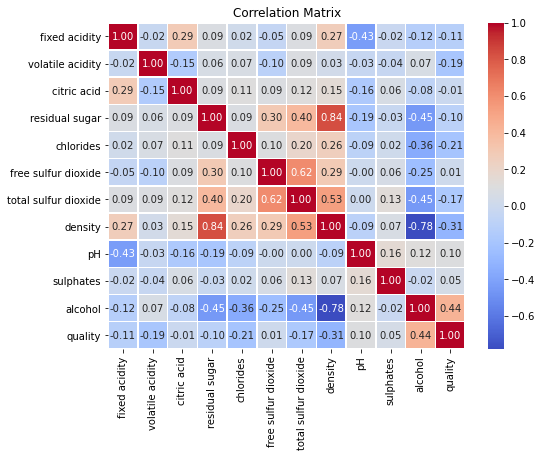

In [5]:
# Compute the correlation matrix
correlation_matrix = df_white_wine.corr()

# Print or display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

- En esta matriz de correlación podemos observar que existe una fuerte correlación positiva entre las variables "residual sugar" y "density" de nuestro dataset.

In [6]:
df_subset = df_white_wine.loc[:,["residual sugar", "density"]]

In [7]:
print(df_subset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   residual sugar  4898 non-null   float64
 1   density         4898 non-null   float64
dtypes: float64(2)
memory usage: 76.7 KB
None


In [8]:
print(df_subset.describe())

       residual sugar      density
count     4898.000000  4898.000000
mean         6.391415     0.994027
std          5.072058     0.002991
min          0.600000     0.987110
25%          1.700000     0.991723
50%          5.200000     0.993740
75%          9.900000     0.996100
max         65.800000     1.038980


In [9]:
df_residual_sugar = df_subset.loc[:,"residual sugar"]
#df_residual_sugar.head()

In [10]:
df_density = df_subset.loc[:,"density"]
#df_density.head()

Ahora analizamos la distribución de ambas variables continuas.

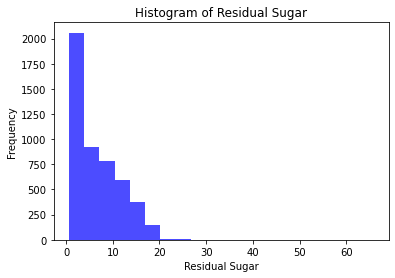

In [11]:
plt.hist(df_residual_sugar, bins=20, color='blue', alpha=0.7)
plt.xlabel('Residual Sugar')
plt.ylabel('Frequency')
plt.title('Histogram of Residual Sugar')
plt.show()

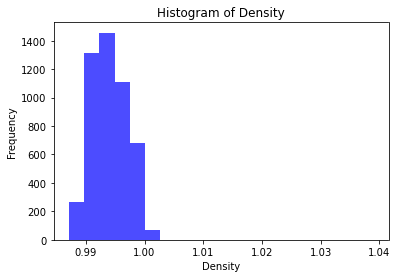

In [12]:
plt.hist(df_density, bins=20, color='blue', alpha=0.7)
plt.xlabel('Density')
plt.ylabel('Frequency')
plt.title('Histogram of Density')
plt.show()

## 3.3 El proceso de construcción del modelo

• Extraer el modelo :
En esta fase, el objetivo es construir un modelo de regresión que pueda predecir la densidad de los vinos blancos de "Vinho Verde" Portugués en función de los azúcares residuales en las 4897 muestras limpias obtenidas.

• Obtener el modelo que representa el conocimiento :
Se utilizará el conjunto de entrenamiento para entrenar un modelo de regresión, como la regresión lineal, regresión polinómica u otros modelos de regresión más avanzados.

Una vez entrenado el modelo, se habrá obtenido una ecuación matemática que relaciona los azúcares residuales con la densidad de los vinos blancos de "Vinho Verde" Portugués. Esta ecuación representa el conocimiento extraído del proceso de construcción del modelo.

### 1. Limpieza de los datos

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


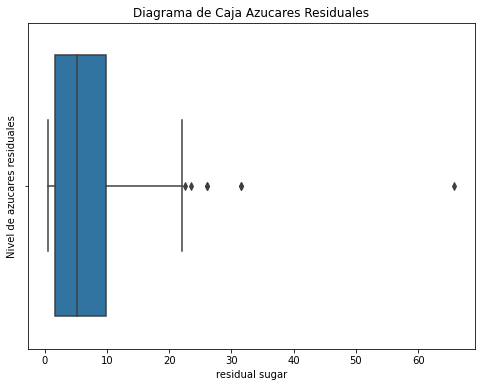

In [13]:
# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Crear el boxplot
sns.boxplot(df_residual_sugar)

# Añadir título y etiquetas a los ejes
plt.title('Diagrama de Caja Azucares Residuales')
plt.ylabel('Nivel de azucares residuales')

# Mostrar el diagrama de caja
plt.show()

- Se observan algunos valores atípicos, la mayoría con valores entre 20-30.
- Eliminaremos los superiores a 25 considerando la posibilidad de lecturas erróneas o que la muestra de vino es defectuosa.

In [14]:
threshold_value = 25
outliers = df_residual_sugar[df_residual_sugar.values > threshold_value]
outliers

1653    31.60
1663    31.60
2781    65.80
3619    26.05
3623    26.05
Name: residual sugar, dtype: float64

In [15]:
df_residual_sugar_cleaned = df_residual_sugar.drop(outliers.index)
df_residual_sugar_cleaned.shape

(4893,)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


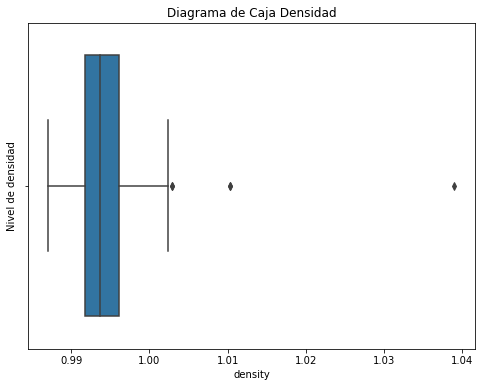

In [16]:
# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Crear el boxplot
sns.boxplot(df_density)

# Añadir título y etiquetas a los ejes
plt.title('Diagrama de Caja Densidad')
plt.ylabel('Nivel de densidad')

# Mostrar el diagrama de caja
plt.show()

- Se observan algunos valores atípicos, la mayoría con valores entre el límite superior del boxplot y 1.01.
- Eliminaremos los superiores a 1.01 considerando la posibilidad de lecturas erróneas o que la muestra de vino es defectuosa.

In [17]:
threshold_value = 1.01
outliers = df_density[df_density.values > threshold_value]
outliers

1653    1.01030
1663    1.01030
2781    1.03898
Name: density, dtype: float64

In [18]:
df_density_cleaned = df_density.drop(outliers.index)
df_density_cleaned = df_density_cleaned.iloc[:-2]
df_density_cleaned.shape

(4893,)

- Luego, con ambas variables procesadas, tendremos 4893 muestras disponibles.

### 2. Transformación de los datos

- No aplica para el análisis de regresión.

### 3. Reducción de la dimensionalidad de los datos

- Se han seleccionado sólo los atributos de densidad y azúcares residuales del dataset original para realizar el estudio de regresión.

## 3.4 Evaluación e interpretación del modelo


• Obtención de los resultados :
Después de entrenar el modelo, se evalua su rendimiento en un conjunto de datos independiente. Para ello, se utilizan los datos del conjunto de prueba.

• Estimaciones de las métricas de evaluación :  
Para evaluar la calidad del modelo, se pueden utilizar diversas métricas de evaluación de regresión, como el error cuadrático medio (MSE), el error absoluto medio (MAE), el coeficiente de determinación (R-cuadrado), entre otros. Estas métricas proporcionarán una medida cuantitativa del rendimiento del modelo.

• Interpretación de los resultados y discusión :    
Finalmente, es importante interpretar los resultados obtenidos y discutir su significado en el contexto del problema de predicción de la densidad de los vinos blancos. Esto puede incluir la interpretación de los coeficientes del modelo, la discusión de la precisión de las predicciones y cómo estas pueden ser utilizadas en aplicaciones prácticas, así como cualquier limitación o supuesto del modelo. Además, se pueden proponer futuras investigaciones o mejoras en el modelo.


- Observemos la relación lineal entre las variables del subset preprocesado en un diagrama de puntos :

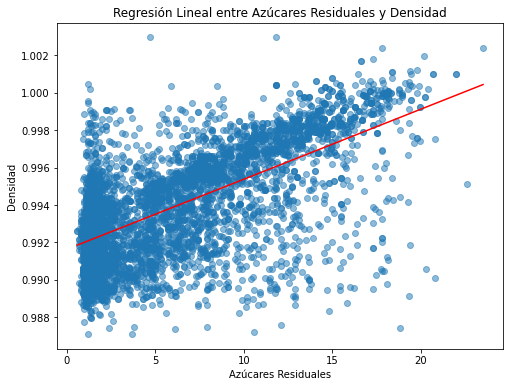

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que tienes un DataFrame llamado 'subset' con las dos variables que deseas comparar

# Extraer las variables predictoras (X) y la variable objetivo (y)
X = df_residual_sugar_cleaned.values.reshape(-1, 1)
y = df_density_cleaned.values

# Ajustar un modelo de regresión lineal
model = np.polyfit(X.ravel(), y, 1)
predict = np.poly1d(model)

# Generar valores para la línea de regresión
x_range = np.linspace(X.min(), X.max(), 100)
y_pred = predict(x_range)

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Graficar los puntos de datos
plt.scatter(X, y, alpha=0.5)

# Graficar la línea de regresión
plt.plot(x_range, y_pred, color='red')

# Añadir título y etiquetas a los ejes
plt.title('Regresión Lineal entre Azúcares Residuales y Densidad')
plt.xlabel('Azúcares Residuales')
plt.ylabel('Densidad')

# Mostrar el gráfico
plt.show()

#### Evaluación de la precisión del modelo mediante el uso de métricas

*   Mean Squared Error
*   Root Mean Squared Error

Mean Squared Error (MSE) en el conjunto de prueba: 4.721492882396176e-06
Root Mean Squared Error (RMSE) en el conjunto de prueba: 0.002172899648487287


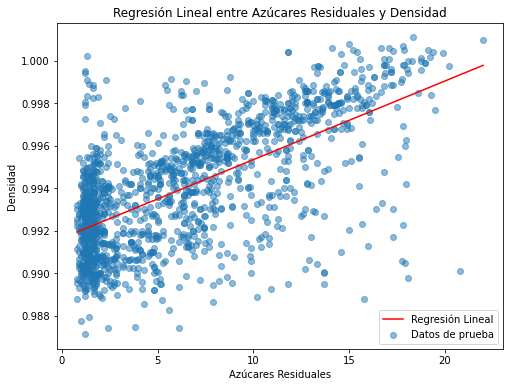

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Suponiendo que 'df' es tu DataFrame
np.random.seed(0)
df = pd.DataFrame({
    'residual_sugar': np.random.rand(100) * 50,  # Azúcares residuales
    'density': np.random.rand(100) * 1000        # Densidad
})

# Dividir los datos en variables predictoras (X) y variable objetivo (y)
X = df_residual_sugar_cleaned.values.reshape(-1, 1)  # Se pone doble corchete para mantener la estructura de DataFrame
y = df_density_cleaned.values

# Dividir el conjunto de datos en set de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Ajustar un modelo de regresión lineal con los datos de entrenamiento
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Generar valores para la línea de regresión usando el conjunto de prueba
x_range = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
y_line = model.predict(x_range)

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Graficar los puntos de datos de prueba
plt.scatter(X_test, y_test, alpha=0.5, label='Datos de prueba')

# Graficar la línea de regresión
plt.plot(x_range, y_line, color='red', label='Regresión Lineal')

# Añadir título y etiquetas a los ejes
plt.title('Regresión Lineal entre Azúcares Residuales y Densidad')
plt.xlabel('Azúcares Residuales')
plt.ylabel('Densidad')
plt.legend()

# Calcular el Mean Squared Error para evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) en el conjunto de prueba: {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE) en el conjunto de prueba: {rmse}")

# Mostrar el gráfico
plt.show()


- Observamos que cuanto mayor es el nivel de azucares residuales de la muestra, mayor es la variabilidad de la predicción de densidad.

## 3.5 Integración de los resultados en el proceso.


- Integración de los resultados
en el proceso del sistema de
información.

Podemos proponer varias formas de integrar el sistema a la producción de vinos blancos de la variedad "Vinho Verde" Portugués.

Por ejemplo:
- Teniendo un sistema de gestión empresarial (ERP), se pueden integrar los resultados del modelo de regresión en este sistema para que los usuarios puedan acceder a las predicciones de densidad directamente desde su entorno de trabajo habitual.

- Configurar un proceso automatizado que genere informes periódicos basados en las predicciones del modelo de regresión. Estos informes pueden ser enviados por correo electrónico o publicados en un tablero de control para que los usuarios puedan revisarlos y tomar decisiones informadas.